In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 80s 7us/step


In [25]:
X_train_flat = X_train.reshape(60000,784,)
X_test_flat = X_test.reshape(10000,784,)
X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [26]:
X_test.shape

(10000, 28, 28)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy']
)

In [32]:
model.fit(X_train_flat,y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8715 - loss: 0.4620
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9632 - loss: 0.1291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9738 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0484


In [33]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1035


[0.09091204404830933, 0.972100019454956]

In [34]:
y_predicted = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
np.argmax(y_predicted[0])

7

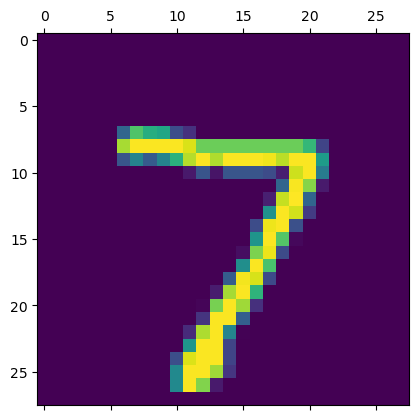

In [41]:
plt.matshow(X_test[0])

In [43]:
y_predicted = [np.argmax(i) for i in y_predicted]

In [44]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    2,    2,    1,    1,    8,    4,    2,    0,    4],
       [   0, 1123,    2,    3,    0,    1,    2,    0,    4,    0],
       [   4,    2,  995,    8,    2,    0,    2,   14,    4,    1],
       [   0,    0,    3,  981,    0,   12,    0,    4,    0,   10],
       [   1,    0,    5,    0,  968,    0,    2,    1,    0,    5],
       [   2,    0,    0,    1,    1,  884,    1,    1,    1,    1],
       [   3,    3,    0,    1,    3,    8,  939,    0,    1,    0],
       [   0,    3,    8,    1,    4,    0,    0, 1005,    2,    5],
       [   1,    0,    5,   14,   11,   20,    4,    5,  902,   12],
       [   1,    2,    0,    9,   17,    5,    1,    6,    0,  968]])>

Text(95.72222222222221, 0.5, 'Truth')

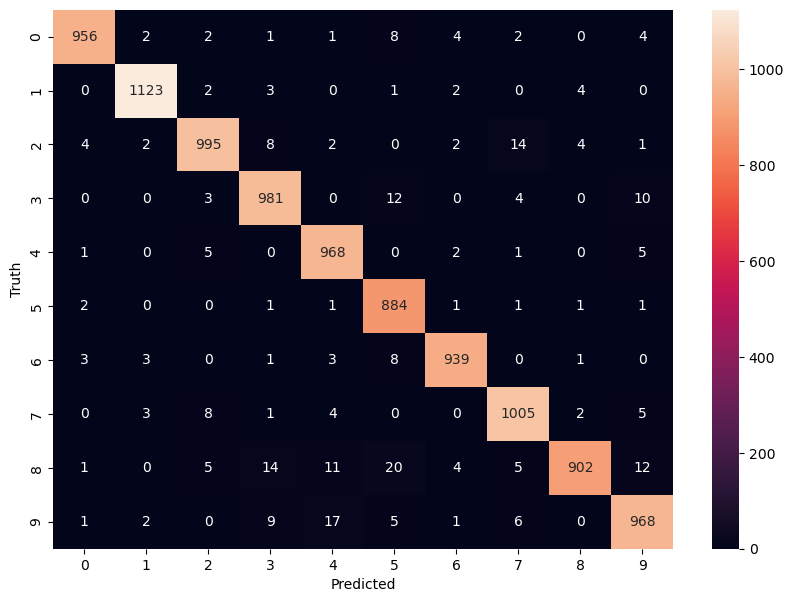

In [49]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')